In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import layers
print(tf.__version__)
import os
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
from model import GANomaly
from absl import logging
logging.set_verbosity(logging.INFO)
logging.set_stderrthreshold(logging.INFO)

def batch_resize(imgs, size: tuple):
    img_out = np.empty((imgs.shape[0],) + size)
    for i in range(imgs.shape[0]):
        img_out[i] = cv2.resize(imgs[i], size, interpolation=cv2.INTER_CUBIC)
    return img_out

2.0.0-rc0


In [2]:
class Option:
    def __init__(self):
        self.anomaly = 2 # the anomaly digit
        self.shuffle_buffer_size = 10000
        self.batch_size = 300
        self.isize = 32 # input size
        self.ckpt_dir = "ckpt"
        self.nz = 100 # latent dims
        self.nc = 1 # input channels
        self.ndf = 64 # number of discriminator's filters
        self.ngf = 64 # number of generator's filters
        self.extralayers = 0
        self.niter = 15 # number of training epochs
        self.lr = 2e-4 
        self.w_adv = 1. # Adversarial loss weight
        self.w_con = 50. # Reconstruction loss weight
        self.w_enc = 1. # Encoder loss weight.
        self.beta1 = 0.5
            
opt = Option()

In [3]:
# dataset
data_train, data_test = tf.keras.datasets.mnist.load_data()
x_train, y_train = data_train
x_test, y_test = data_test
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
# resize to (32, 32)
x_train = batch_resize(x_train, (32, 32))[..., None]
x_test = batch_resize(x_test, (32, 32))[..., None]
# normalization
mean = x_train.mean()
stddev = x_train.std()
x_train = (x_train-mean)/stddev
x_test = (x_test-mean)/stddev
print(x_train.shape, x_train.shape)
# define abnoraml data and normal
# training data only contains normal
x_train = x_train[y_train!=opt.anomaly]
y_train = y_train[y_train!=opt.anomaly]
y_test = (y_test==opt.anomaly).astype(np.float32)
# tf.data.Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
train_dataset = train_dataset.shuffle(opt.shuffle_buffer_size).batch(opt.batch_size, drop_remainder=True)
test_dataset = test_dataset.batch(opt.batch_size, drop_remainder=False)

(60000, 32, 32, 1) (60000, 32, 32, 1)


In [4]:
ganomaly = GANomaly(opt, train_dataset, valid_dataset=None, test_dataset=test_dataset)

In [5]:
ganomaly.fit(opt.niter)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



INFO:absl:epoch: 0, G_losses: 23.2235, D_losses: 0.6404, samples/sec: 3515.1968


INFO:absl:*** 	 Testing:   roc_auc: 0.4286   average_precision: 0.0818 ***


INFO:absl:epoch: 1, G_losses: 20.7901, D_losses: 0.0311, samples/sec: 6037.5740


INFO:absl:*** 	 Testing:   roc_auc: 0.5962   average_precision: 0.1223 ***


INFO:absl:epoch: 2, G_losses: 17.0200, D_losses: 0.0088, samples/sec: 6004.8680


INFO:absl:*** 	 Testing:   roc_auc: 0.9255   average_precision: 0.5721 ***


INFO:absl:epoch: 3, G_losses: 15.2609, D_losses: 0.0064, samples/sec: 6099.2286


INFO:absl:	 Testing:   roc_auc: 0.8614   average_precision: 0.4135


INFO:absl:epoch: 4, G_losses: 14.3134, D_losses: 0.0053, samples/sec: 6105.4841


INFO:absl:*** 	 Testing:   roc_auc: 0.9431   average_precision: 0.6084 ***


INFO:absl:epoch: 5, G_losses: 13.7432, D_losses: 0.0031, samples/sec: 6070.9288


INFO:absl:	 Testing:   roc_auc: 0.9339   average_precision: 0.5572


INFO:absl:epoch: 6, G_losses: 13.3667, D_losses: 0.0020, samples/sec: 6191.3731


INFO:absl:	 Testing:   roc_auc: 0.9391   average_precision: 0.5743


INFO:absl:epoch: 7, G_losses: 13.1030, D_losses: 0.0026, samples/sec: 6311.5772


INFO:absl:	 Testing:   roc_auc: 0.9353   average_precision: 0.5508


INFO:absl:epoch: 8, G_losses: 12.9052, D_losses: 0.0011, samples/sec: 6319.5554


INFO:absl:*** 	 Testing:   roc_auc: 0.9472   average_precision: 0.5901 ***


INFO:absl:epoch: 9, G_losses: 12.7763, D_losses: 0.0011, samples/sec: 6096.7652


INFO:absl:*** 	 Testing:   roc_auc: 0.9473   average_precision: 0.5810 ***


INFO:absl:epoch: 10, G_losses: 12.6430, D_losses: 0.0008, samples/sec: 6177.2143


INFO:absl:	 Testing:   roc_auc: 0.9386   average_precision: 0.5529


INFO:absl:epoch: 11, G_losses: 14.9309, D_losses: 7.1135, samples/sec: 6365.5426


INFO:absl:	 Testing:   roc_auc: 0.9133   average_precision: 0.4745


INFO:absl:epoch: 12, G_losses: 15.0505, D_losses: 7.7125, samples/sec: 6409.6335


INFO:absl:	 Testing:   roc_auc: 0.8933   average_precision: 0.4350


INFO:absl:epoch: 13, G_losses: 14.9569, D_losses: 7.7125, samples/sec: 6515.4305


INFO:absl:	 Testing:   roc_auc: 0.9265   average_precision: 0.5081


INFO:absl:epoch: 14, G_losses: 14.8712, D_losses: 7.7125, samples/sec: 6354.1383


INFO:absl:	 Testing:   roc_auc: 0.9097   average_precision: 0.4758


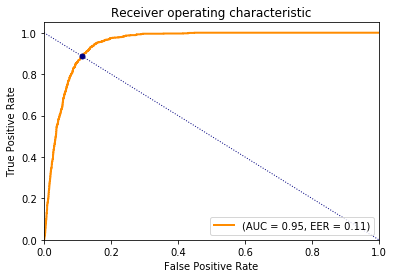

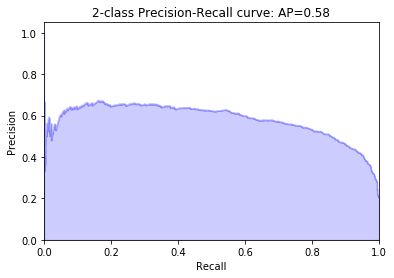

In [6]:
ganomaly.evaluate_best(test_dataset)